## Практическое задание

<ol>
    1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. 
       Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?</ol>    
<ol>    
        2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.</ol>    
<ol>
*3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</ol>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

dict_error = {}

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
%%time
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 73s 39ms/step - loss: 2.1992 - accuracy: 0.2617
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 2.2758 - accuracy: 0.1854
Epoch 3/5
1875/1875 [==============================] - 69s 37ms/step - loss: 2.2418 - accuracy: 0.2193
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 2.3366 - accuracy: 0.1245
Epoch 5/5
1875/1875 [==============================] - 78s 41ms/step - loss: 2.3357 - accuracy: 0.1255
313/313 - 4s - loss: 2.3351 - accuracy: 0.1260

Test accuracy: 0.12600000202655792
Wall time: 6min 7s


In [8]:
dict_error['128'] = test_acc

In [9]:
dict_error

{'128': 0.12600000202655792}

In [10]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(test_images)

In [12]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.23196931, 0.08533674],
      dtype=float32)

In [13]:
np.argmax(predictions[0])==test_labels[0]

False

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

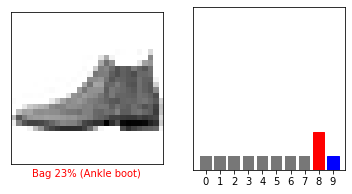

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [16]:
img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

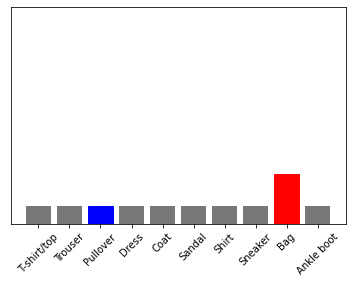

In [17]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [18]:
np.argmax(predictions_single[0])

8